Original code by **Raghavender Ganesh**.   

## Implementing Data Mining on Non Clinical Data
Non clinical data inludes factors like diet, smoking, physical activity, etc.

#### Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#### Dataframe with Sample Data

In [3]:
data={
    "Age":np.random.randint(20,80,100),
    "BMI":np.random.randint(18,35,100),
    "Smoking":np.random.randint(0,2,100),
    "Alchohol_Consumption":np.random.randint(0,4,100),
    "Physical_Activity":np.random.randint(0,4,100),
    "Chronic_Disease":np.random.randint(0,2,100)
}

df = pd.DataFrame(data)

df.head()

,Age,BMI,Smoking,Alchohol_Consumption,Physical_Activity,Chronic_Disease
0,59,23,1,0,1,1
1,75,31,0,1,2,0
2,22,27,1,1,3,0
3,51,30,1,0,3,1
4,65,33,0,3,2,1


### Scaling

In [4]:
features=['Age','BMI','Smoking','Alchohol_Consumption','Physical_Activity','Chronic_Disease']

scaler=StandardScaler()
df[features]=scaler.fit_transform(df[features])

### Pairplot

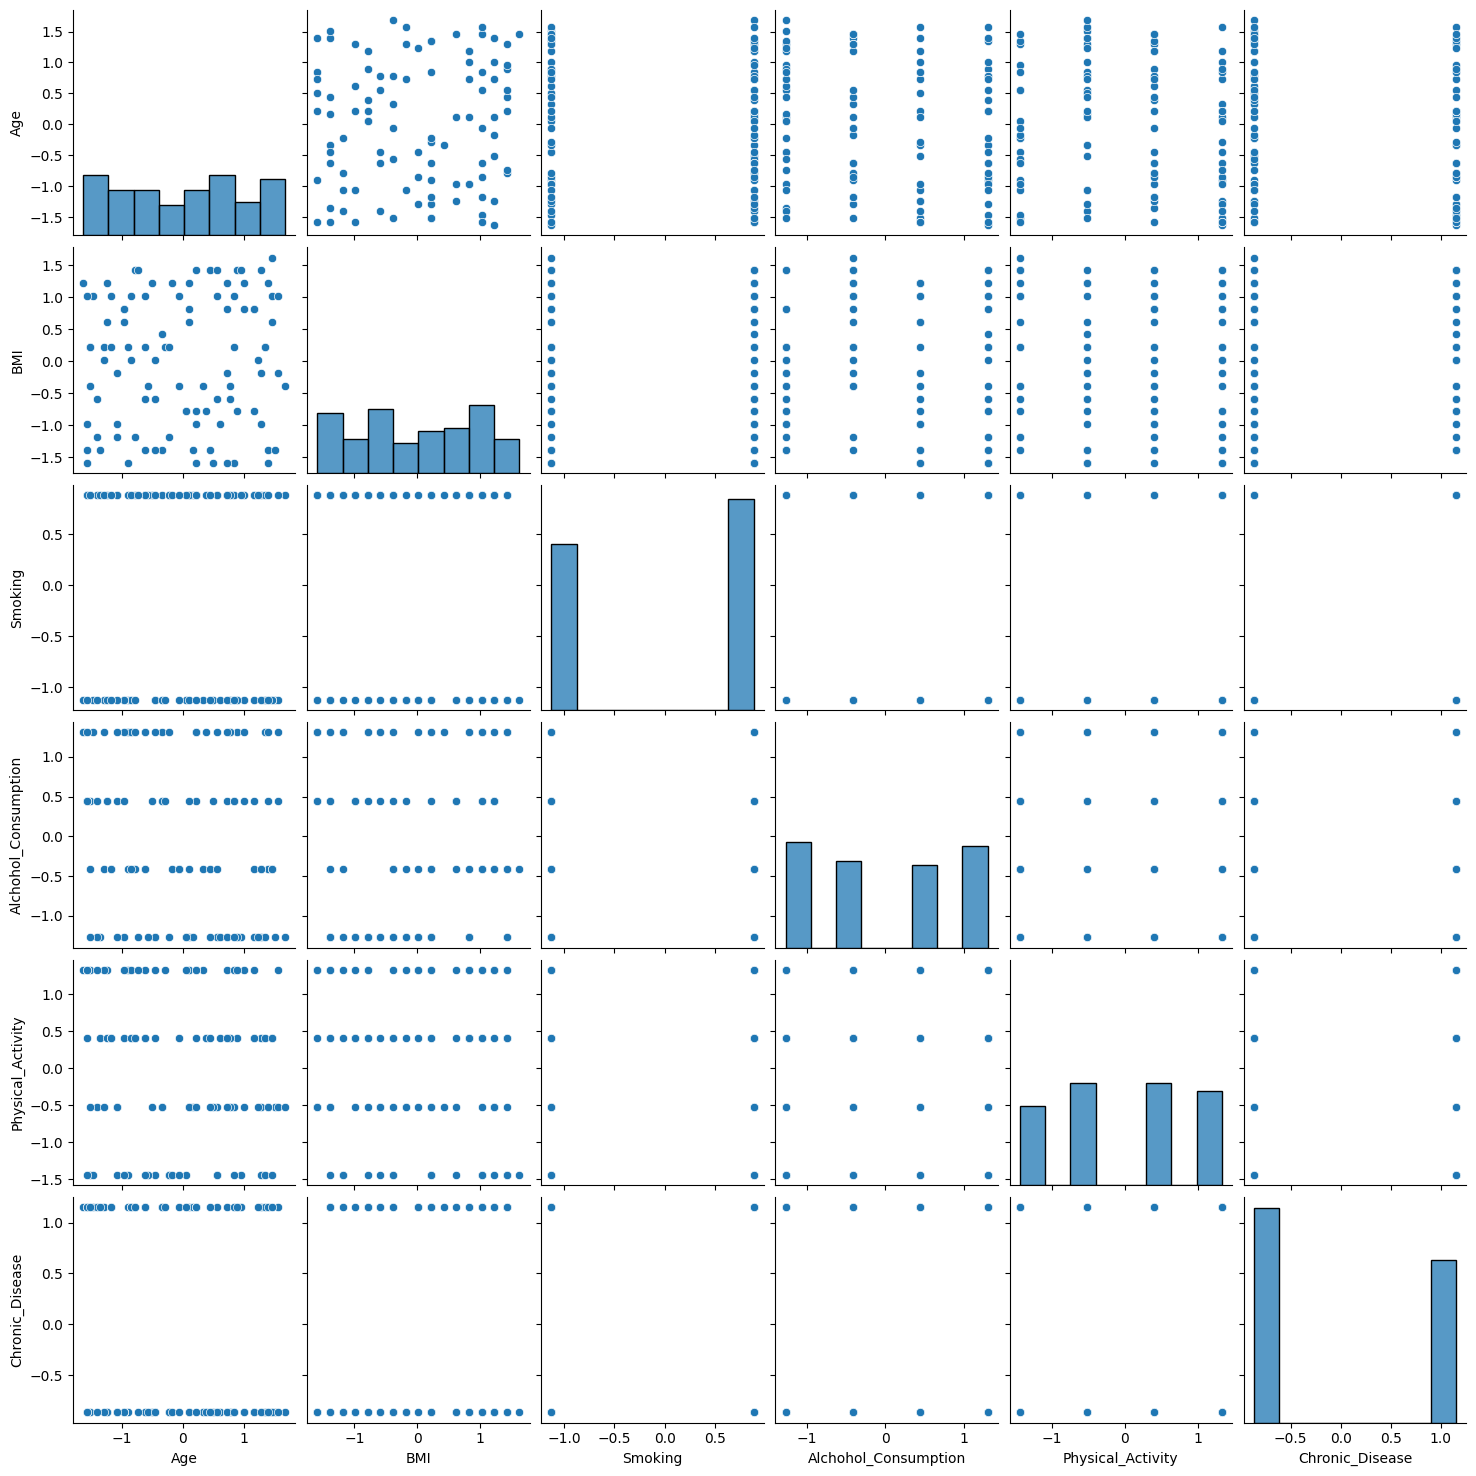

In [5]:
sns.pairplot(df)


### Correlation Matrix

<Axes: >

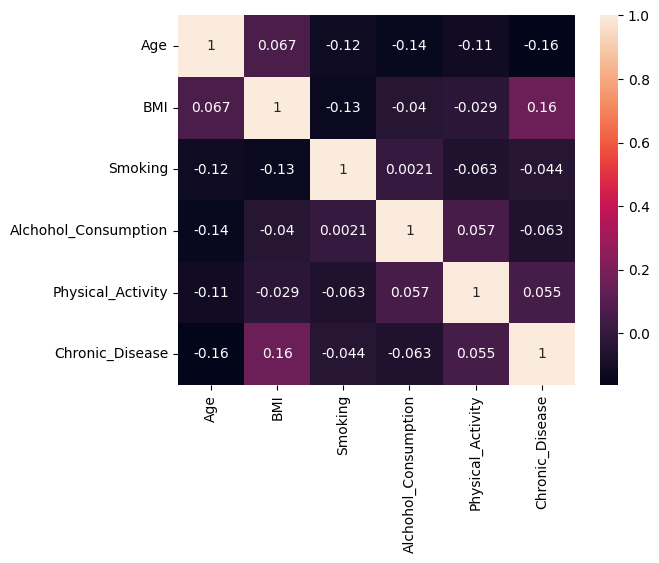

In [6]:
corr = df.corr()
sns.heatmap(corr,annot=True)

### PCA

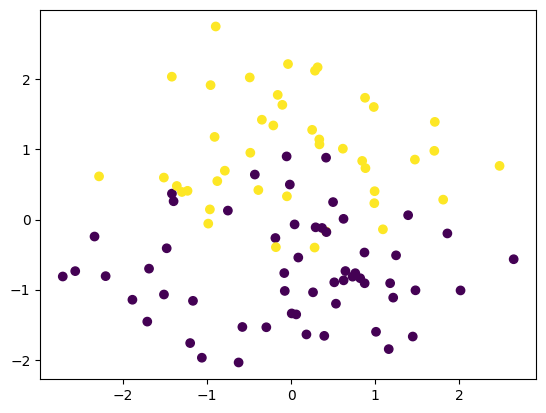

In [7]:
pca = PCA(n_components=2)

# Apply PCA on features
pca_data = pca.fit_transform(df[features])
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

# This is for label
pca_df['Chronic_Disease'] = df['Chronic_Disease']

plt.scatter(
    pca_df['PCA1'], 
    pca_df['PCA2'], 
    c=pca_df['Chronic_Disease']
    )


### K-Means Clustering

In [10]:
pca_df.head()

,PCA1,PCA2,Chronic_Disease
0,0.415441,-0.169513,1.151339
1,1.858590,-0.197904,-0.868554
2,-1.397006,0.261472,-0.868554
3,0.250421,1.279976,1.151339
4,0.983553,1.606022,1.151339


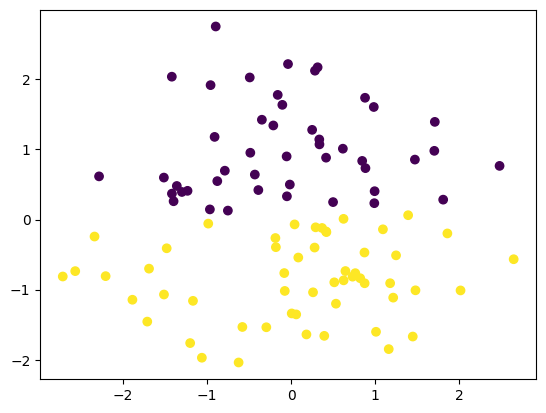

In [11]:
kmeans = KMeans(n_clusters=2)

features = ['PCA1','PCA2']

pca_df['Clusters'] = kmeans.fit_predict(pca_df[features])

# Output
plt.scatter(
    pca_df['PCA1'], pca_df['PCA2'], c = pca_df['Clusters']
    )